# Install the required libraries for data loading and manuplating it.

In [41]:
# !pip install pandas
# !pip install seaborn
# !pip install matplotlib
# !pip install numpy

# For ignoring the unnecessary warnings while coding

In [42]:
import warnings
warnings.filterwarnings('ignore')

# Lode the necessary libraries

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the Data file.

In [44]:
dataset = pd.read_csv("Diwali Sales Data.csv",encoding="latin1")

# Understand the data and drive only the required columns for analysis
-  Gender wise sales
-  Age Group wise sales
-  Marital Status wise sales
-  State wise orders and sales
-  Zone wise orders and sales 
-  Occupation wise orders and sales
-  Product_Category wise orders and sales

In [45]:
dataset.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# Data-Preprocessing Step

In [46]:
df = dataset[['User_ID','Gender','Age Group','Age','Marital_Status','State','Zone','Occupation','Product_Category','Orders','Amount']]

In [47]:
df.head(2)

,User_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0


In [48]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Gender            11251 non-null  str    
 2   Age Group         11251 non-null  str    
 3   Age               11251 non-null  int64  
 4   Marital_Status    11251 non-null  int64  
 5   State             11251 non-null  str    
 6   Zone              11251 non-null  str    
 7   Occupation        11251 non-null  str    
 8   Product_Category  11251 non-null  str    
 9   Orders            11251 non-null  int64  
 10  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), str(6)
memory usage: 967.0 KB


In [49]:
df.isnull().sum()

User_ID              0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [50]:
df['Amount'] = df['Amount'].fillna(df['Amount'].mean())

In [51]:
df.isnull().sum()

User_ID             0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [52]:
# In the above Data-preprocessing process, take only specific columns for analysis and fill up the null value in amount column by it's mean.

# Exploratory Data Analysis (EDA)

# Gender Wise Sales Analysis

### Customer who Expense most in the sales are Female customer's

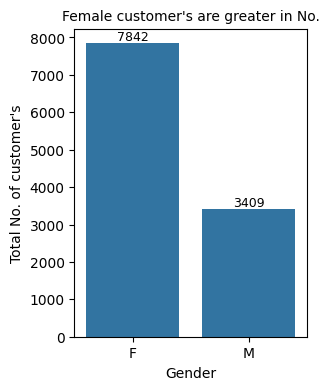

In [53]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='Gender',data=df)

for bars in ax.containers:
    ax.bar_label(bars,fontsize=9)

plt.title("Female customer's are greater in No.",fontsize=10)
plt.ylabel("Total No. of customer's")
plt.xlabel("Gender")
plt.show()

In [54]:
# In the above, Female customers are the Greater in number from rest of the men.

### Most Expense the money in sales are also Female customer's

In [55]:
gender_wise_sales = df.groupby('Gender',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

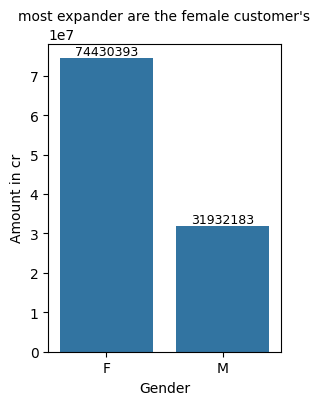

In [56]:
plt.figure(figsize=(3,4))
ax = sns.barplot(x='Gender',y='Amount',data=gender_wise_sales)

for bars in ax.containers:
    ax.bar_label(bars,fontsize=9,fmt="%.0f")

plt.title("most expander are the female customer's",fontsize=10)
plt.ylabel("Amount in cr")
plt.xlabel("Gender")

plt.show()

In [57]:
# In the given figure, female customer's are most frequent Expense than male customer's.

# Age_Group wise Sales Analysis

#### Total Number of customer's Age

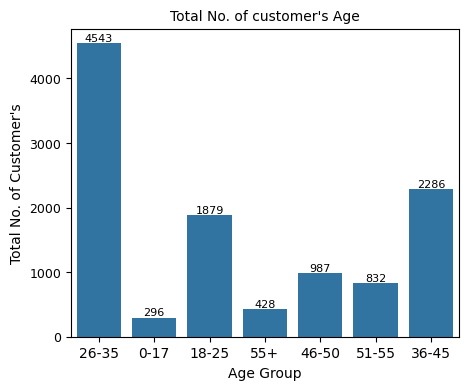

In [58]:
plt.figure(figsize=(5,4))
ax = sns.countplot(x='Age Group',data=df)

for bars in ax.containers:
    ax.bar_label(bars,fontsize=8)

plt.title("Total No. of customer's Age",fontsize=10)
plt.ylabel("Total No. of Customer's")
plt.xlabel("Age Group")

ax.tick_params(axis='y',labelsize=9)
plt.show()

In [59]:
# Total Number of customer's are belong's to 26-35 yrs Age Group for most of the Expense.

#### most Expense's customer's are from age group 

In [60]:
age_group_wise_sales = df.groupby('Age Group',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

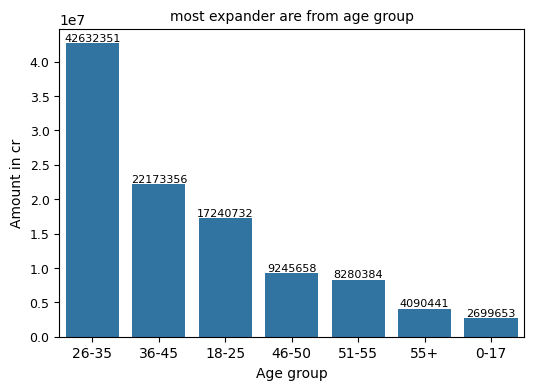

In [61]:
plt.figure(figsize=(6,4))
ax = sns.barplot(x='Age Group',y='Amount',data=age_group_wise_sales)

for bars in ax.containers:
    ax.bar_label(bars,fontsize=8,fmt='%.0f')

ax.tick_params(axis='y',labelsize=9)

plt.title("most expander are from age group",fontsize=10)
plt.ylabel("Amount in cr")
plt.xlabel("Age group")
plt.show()

In [62]:
# Total Number of customer's are belong's to 26-35 yrs Age Group and also the most Expense among all group's

# Marital Status wise sales Analysis

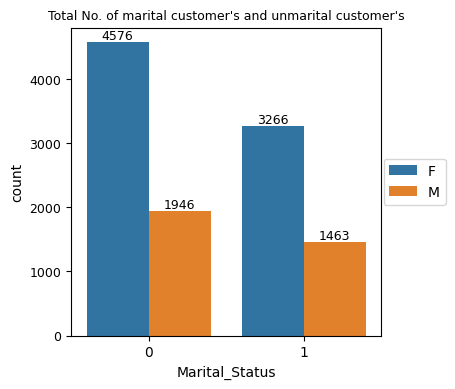

In [63]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x='Marital_Status',data=df,hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars,fontsize=9)

plt.title("Total No. of marital customer's and unmarital customer's",fontsize=9)
ax.tick_params(axis='y',labelsize=9)

plt.legend(loc='center right',bbox_to_anchor=(1.23,0.5))
plt.show()

In [64]:
# Total No. of Female and Male custmer's from the marit and unmarit status. 

In [65]:
marital_status_wise_sales = df.groupby('Marital_Status',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

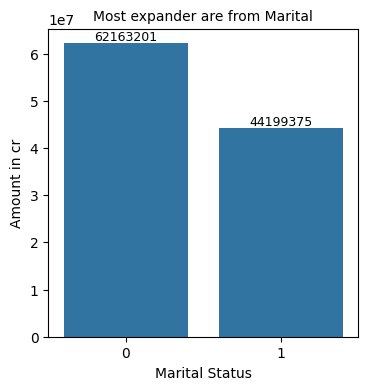

In [66]:
plt.figure(figsize=(4,4))
ax = sns.barplot(x='Marital_Status',y='Amount',data=marital_status_wise_sales)

for bars in ax.containers:
    ax.bar_label(bars,fontsize=9,fmt='%.0f')

plt.title("Most expander are from Marital",fontsize=10)
plt.ylabel("Amount in cr")
plt.xlabel("Marital Status")

plt.show()

In [67]:
# In the above figure, Female custmer's from the marit and unmarit status are the most Expense.

# State wise orders and sales Analysis

### State wise orders Analysis

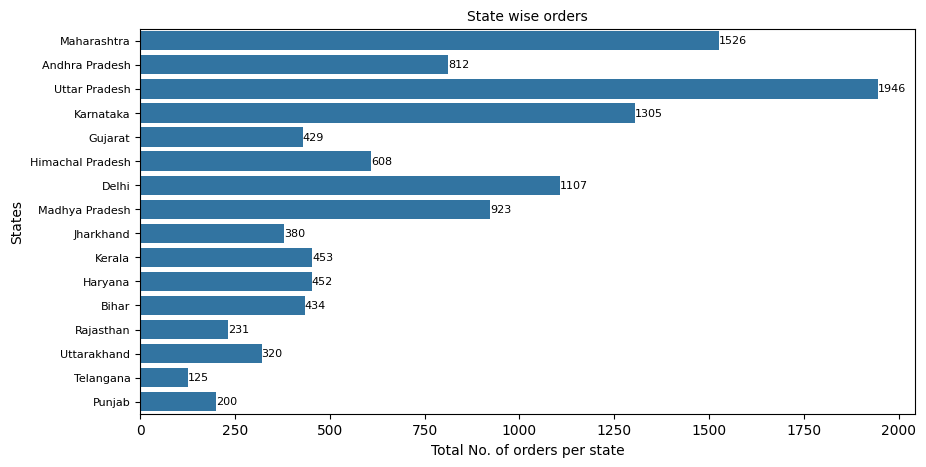

In [68]:
plt.figure(figsize=(10,5))
ax = sns.countplot(y='State',data=df)

for bars in ax.containers:
    ax.bar_label(bars,fontsize=8)

ax.tick_params(axis='y',labelsize=8)
plt.xlabel("Total No. of orders per state",fontsize=10)
plt.ylabel("States",fontsize=10)


plt.title('State wise orders',fontsize=10)
plt.show()

In [69]:
# In the above state, Uttar Pradesh, Maharastra, Karanataka and Delhi are the most highest Expense for orders.

### State wise sales Analysis

In [70]:
state_wise_sales = df.groupby('State',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

Text(0.5, 1.0, 'State wise sales')

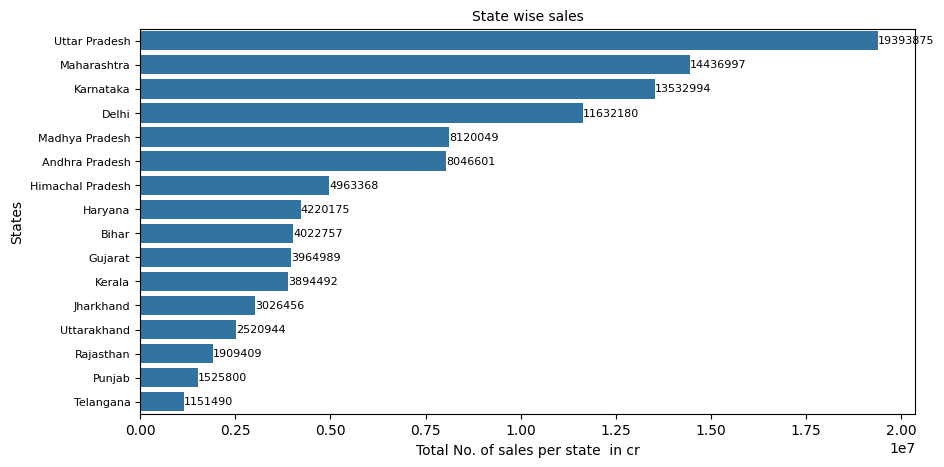

In [71]:
plt.figure(figsize=(10,5))
ax = sns.barplot(y='State',x='Amount',data=state_wise_sales)

for bars in ax.containers:
    ax.bar_label(bars,fontsize=8,fmt='%.0f')

ax.tick_params(axis='y',labelsize=8)

plt.xlabel("Total No. of sales per state  in cr",fontsize=10)
plt.ylabel("States",fontsize=10)


plt.title('State wise sales',fontsize=10)

In [72]:
# In the above state, Uttar Pradesh, Maharastra, Karanataka and Delhi are the most highest Expense.

# Zone wise orders, sales and Total Transications Analysis

### Zone wise orders Analysis 

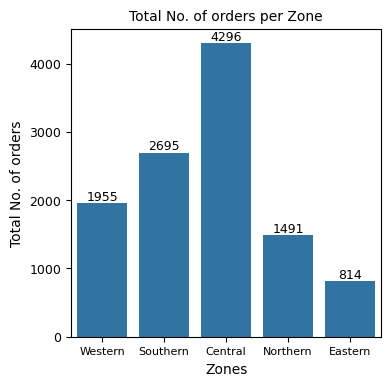

In [73]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x='Zone',data=df)

for bars in ax.containers:
    ax.bar_label(bars,fontsize=9)

ax.tick_params(axis='x',labelsize=8)
ax.tick_params(axis='y',labelsize=9)

plt.title('Total No. of orders per Zone',fontsize=10)
plt.xlabel("Zones")
plt.ylabel("Total No. of orders")

plt.show()

In [74]:
# In the above figure, Central, southern and western zone make the highest Expense for orders.

### Zone wise sales Analysis

In [75]:
zone_wise_sales = df.groupby('Zone',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

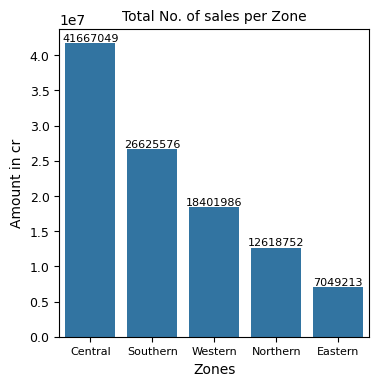

In [76]:
plt.figure(figsize=(4,4))
ax = sns.barplot(x='Zone',y='Amount',data=zone_wise_sales)

for bars in ax.containers:
    ax.bar_label(bars,fontsize=8,fmt='%.0f')

ax.tick_params(axis='x',labelsize=8)
ax.tick_params(axis='y',labelsize=9)

plt.title('Total No. of sales per Zone',fontsize=10)
plt.xlabel("Zones")
plt.ylabel("Amount in cr")

plt.show()

In [77]:
# In the above figure, Central, southern and western zone make the highest Expense among all zones.

### Zone wise Total Transications Analysis

In [78]:
zone_wise_transaction = df.groupby('Zone',as_index=False)['User_ID'].count().sort_values(by='User_ID',ascending=False)

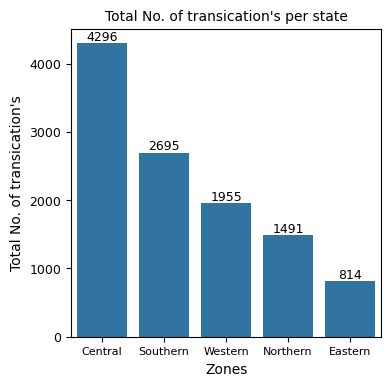

In [79]:
plt.figure(figsize=(4,4))
ax = sns.barplot(x='Zone',y='User_ID',data=zone_wise_transaction)

for bars in ax.containers:
    ax.bar_label(bars,fontsize=9,fmt='%.0f')

ax.tick_params(axis='x',labelsize=8)
ax.tick_params(axis='y',labelsize=9)

plt.title("Total No. of transication's per state",fontsize=10)
plt.xlabel("Zones")
plt.ylabel("Total No. of transication's")

plt.show()

In [80]:
# In the above figure, Central, southern and western zone make the highest Expense transication among all zones.

# Occupation wise orders and sales Analysis

### Occupation wise orders Analysis

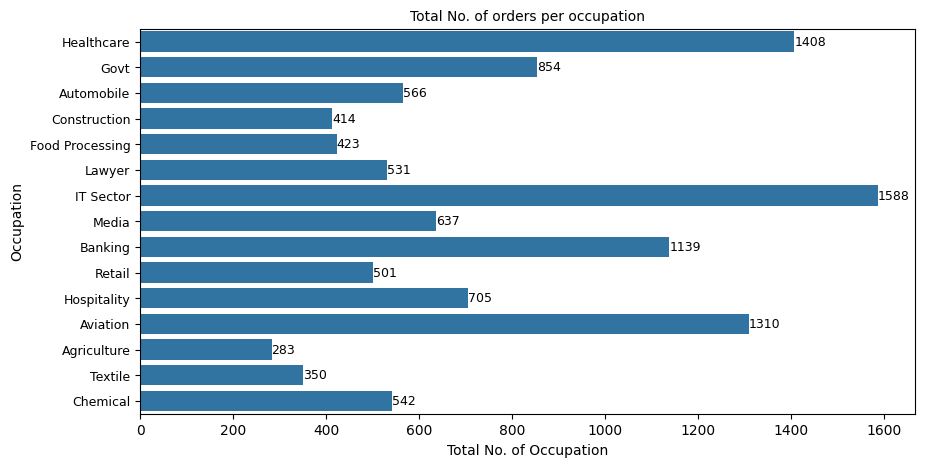

In [81]:
plt.figure(figsize=(10,5))
ax = sns.countplot(y='Occupation',data=df)

for bars in ax.containers:
    ax.bar_label(bars,fontsize=9)


ax.tick_params(axis='y',labelsize=9)

plt.ylabel("Occupation")
plt.xlabel("Total No. of Occupation")

plt.title('Total No. of orders per occupation',fontsize=10)
plt.show()

In [82]:
# In the given figure, occupation ('IT','Healthcare','Avation') sector's are the most orders amoung all sector's

### Occupation wise sales Analysis

In [83]:
occupation_wise_sales = df.groupby('Occupation',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

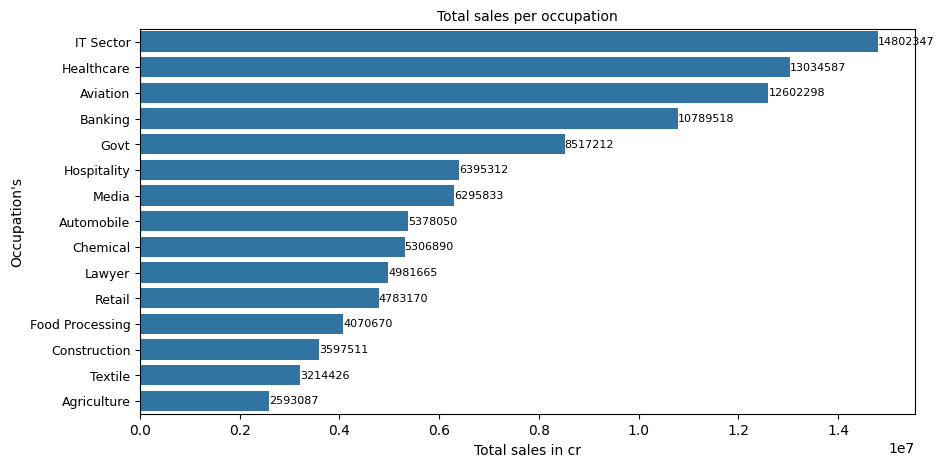

In [84]:
plt.figure(figsize=(10,5))
ax = sns.barplot(y='Occupation',x='Amount',data=occupation_wise_sales)

for bars in ax.containers:
    ax.bar_label(bars,fontsize=8,fmt='%.0f')


ax.tick_params(axis='y',labelsize=9)

plt.ylabel("Occupation's")
plt.xlabel("Total sales in cr")

plt.title('Total sales per occupation',fontsize=10)
plt.show()

In [85]:
# In the given figure above, occupation ('IT','Healthcare','Avation','Banking') sector's are the highest sales amoung all sector's
# where customer invest there money most of the time.

# Product_Category wise orders and sales

### Product_Category wise orders Analysis

In [86]:
df['Product_Category'].value_counts()

Product_Category
Clothing & Apparel       2655
Food                     2493
Electronics & Gadgets    2087
Footwear & Shoes         1064
Household items           520
Beauty                    422
Games & Toys              386
Sports Products           356
Furniture                 353
Pet Care                  212
Office                    113
Stationery                112
Books                     103
Auto                      100
Decor                      96
Veterinary                 81
Tupperware                 72
Hand & Power Tools         26
Name: count, dtype: int64

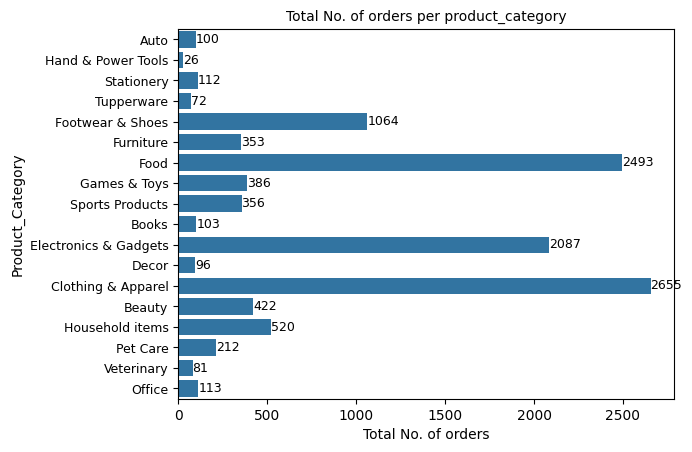

In [87]:
ax = sns.countplot(y='Product_Category',data=df)

for bars in ax.containers:
    ax.bar_label(bars,fontsize=9)

ax.tick_params(axis='y',labelsize=9)
plt.xlabel('Total No. of orders')
plt.title('Total No. of orders per product_category',fontsize=10)
plt.show()

In [88]:
# In the given figure, product_category ('Clothing & Apparel','Food','Electronics & Gadgets') where customer's mostly order.

### Product_Category wise sales Analysis

In [89]:
product_category_wise_sales = df.groupby("Product_Category",as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

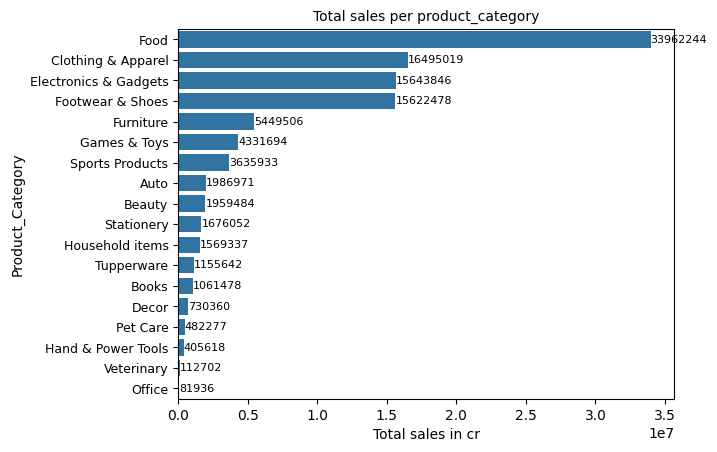

In [90]:
ax = sns.barplot(y='Product_Category',x='Amount',data=product_category_wise_sales)

for bars in ax.containers:
    ax.bar_label(bars,fontsize=8,fmt='%.0f')

ax.tick_params(axis='y',labelsize=9)
plt.xlabel('Total sales in cr')
plt.title('Total sales per product_category',fontsize=10)
plt.show()

In [91]:
# In the given figure, product_category ('Food') where customer's Expense the most, and  
# product_category ('Clothing & Apparel','Electronics & Gadgets','Footwear & Shoes') are approximately same level of investment.

# Conclusion

In [92]:
# Conclusion : 26-35 Age group, Female customer's who working in the ('IT','Healthcare','Avation','Banking') Sector's from the marit and unmarit 
# who Expense the most in 'Food','Clothing & Apparel','Electronics & Gadgets', are belongs to the Uttar Pradesh, Maharastra, Karanataka and Delhi state